In [1]:
import sys
sys.path.append('..')

import logging
from pathlib import Path
import torch
import matplotlib.pyplot as plt

import noisy

fmt = '[%(asctime)s|%(name)s|%(levelname)s] %(message)s'
logging.basicConfig(format=fmt, level=logging.INFO)

/home/nf/dev/denoise/noisy/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cfg = noisy.utils.AttrDict.from_yaml('../configs/default.yaml')
cfg.diffusion.T = 1000
cfg.data.path = '../data/birds'
ds = noisy.dataset.ImgDataset(cfg)

[2022-06-21 18:07:37,055|noisy.dataset|INFO] Loading cache file: ../data/birds/.3x64x64.cache


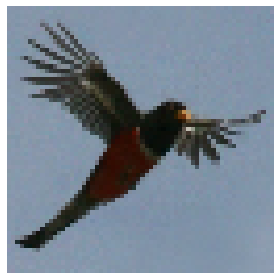

In [3]:
dl = torch.utils.data.DataLoader(ds, batch_size=1, shuffle=True)
imgs = next(iter(dl))
noisy.utils.show(imgs * 0.5 + 0.5)
plt.show()

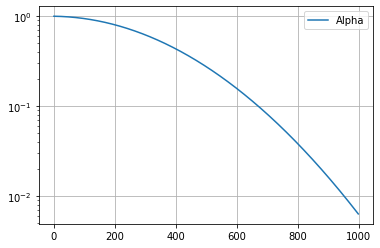

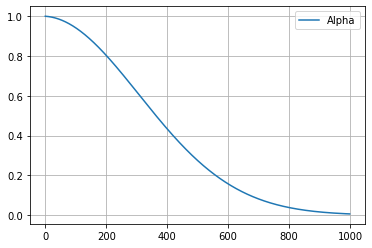

In [4]:
beta_sched = noisy.diffusion.get_beta_sched(cfg)
alpha_sched = noisy.diffusion.get_alpha_cumprod_sched(beta_sched)

plt.plot(alpha_sched, label='Alpha')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

plt.plot(alpha_sched, label='Alpha')
plt.legend()
plt.grid()
plt.show()

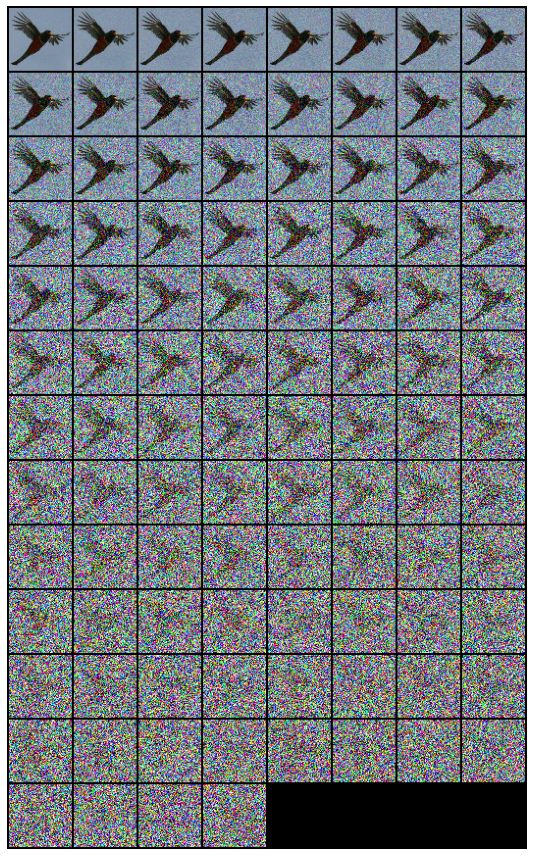

In [5]:
diff = [noisy.training.forward_diffuse(imgs, t, alpha_sched) for t in torch.arange(0, 1000, step=10)]
diff = torch.cat(diff, dim=0)
noisy.utils.show(diff * 0.5 + 0.5)
plt.show()